## Regularized Logistic Regression

In [1]:
##import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("ex2data2.txt", header=None)
df.head()

,0,1,2
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [3]:
df.describe()

,0,1,2
count,118.000000,118.000000,118.000000
mean,0.054779,0.183102,0.491525
std,0.496654,0.519743,0.502060
min,-0.830070,-0.769740,0.000000
25%,-0.372120,-0.254385,0.000000
50%,-0.006336,0.213455,0.000000
75%,0.478970,0.646562,1.000000
max,1.070900,1.108900,1.000000


In [4]:
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values
#y.shape

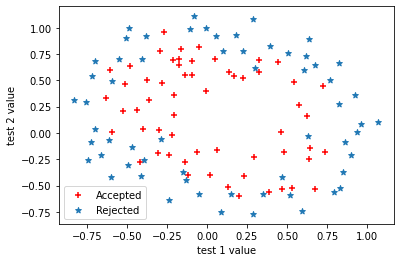

In [5]:
accepted,rejected= (y==1).reshape(len(y),1),(y==0).reshape(len(y),1)
plt.scatter(X[accepted[:,0],0],X[accepted[:,0],1],c='r',marker='+',label="Accepted")
plt.scatter(X[rejected[:,0],0],X[rejected[:,0],1],marker='*',label='Rejected')
plt.xlabel("test 1 value")
plt.ylabel("test 2 value")
plt.legend()

## Feature mapping

with k variables and degrees of n, the number of polynomial terms:

$ {k+ n \choose n}$

In [6]:
def FeatureMapping(x1,x2,degree):
    """
      FeatureMapping Feature mapping function to polynomial features
      FeatureMapping(X1, X2) maps the two input features   to quadratic features used in the regularization exercise.
      Returns a new feature array with more features, comprising of 
      X1, X2, X1.^2, X2.^2, X1*X2, X1*X2.^2, etc..

       Inputs X1, X2 must be the same size
    """
    out=np.ones((len(x1),1))
    for i in range(1,degree+1):
        for j in range(i+1):
            terms=(x1**(i-j) * x2**(j)).reshape(len(x1),1)
            out=np.hstack((out,terms))
    return out
                

    

In [7]:
X=FeatureMapping(X[:,0],X[:,1],6)

In [8]:
X.shape

(118, 28)

### Computing Regularize Cost Function and Gradient

$J(\Theta) = \frac{1}{m} \sum_{i=1}^{m} [ -y^{(i)}log(h_{\Theta}(x^{(i)})) - (1 - y^{(i)})log(1 - (h_{\Theta}(x^{(i)}))] + \frac{\lambda}{2m} \sum_{j=1}^n \Theta_j^2$

$ \frac{\partial J(\Theta)}{\partial \Theta_j} = \frac{1}{m} \sum_{i=1}^{m} (h_{\Theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$ for $j=0$

$ \frac{\partial J(\Theta)}{\partial \Theta_j} = \frac{1}{m} \sum_{i=1}^{m} (h_{\Theta}(x^{(i)}) - y^{(i)})x_j^{(i)} + \frac{\lambda}{m}\Theta_j$ for $j\geq 1$

In [9]:
def sigmoid(z):
    return 1 / (1+np.exp(-z))

In [10]:
sigmoid(0)

0.5

In [11]:
def costFunctionReg(theta, X, y, Lambda):
    m = len(y)
    y=y[:,np.newaxis]#making y a 1 d to 2 d array
    predictions=sigmoid(X @ theta)#calculating the ℎΘ(𝑥(𝑖)
    #calculating error term [−𝑦(𝑖)𝑙𝑜𝑔(ℎΘ(𝑥(𝑖)))−(1−𝑦(𝑖))𝑙𝑜𝑔(1−(ℎΘ(𝑥(𝑖)))]
    error= (-y * np.log(predictions)) -((1-y)* np.log(1-predictions))
    cost=1/m * sum(error)#cost term
    #adding regularization term
    reg_cost=cost + Lambda/(2*m) * sum(theta**2)
    #calculating Gradient
    j_0=1/m * (X.transpose() @ (predictions-y))[0]
    j_1=1/m * (X.transpose() @ (predictions-y))[1:] + (Lambda/m)* theta[1:]
    gradient=np.vstack((j_0[:np.newaxis],j_1))
    return reg_cost,gradient
 

In [12]:
#setting theta initial value as size of new x
theta_initial=np.zeros((X.shape[1],1))
#seting lamda=1
Lambda=1

#compute the cost function with regularization
cost,gradient=costFunctionReg(theta_initial, X, y, Lambda)
print("Cost at initial theta (zeros):",cost)

Cost at initial theta (zeros): [0.69314718]


In [13]:
theta_initial.shape

(28, 1)

## Gradient decent with Regularization

In [14]:
def gradientDescent(X,y,theta,alpha,iterations,Lambda):
    m= len(y)
    cost_hist=[]
    
    for i in range(iterations):
        cost,gradient=costFunctionReg(theta, X, y, Lambda)
        theta=theta - (alpha * gradient)
        cost_hist.append(cost)
    return theta,cost_hist

In [15]:
def gradientDescent(X,y,theta,alpha,num_iters,Lambda):
    """
    Take in numpy array X, y and theta and update theta by taking num_iters gradient steps
    with learning rate of alpha
    
    return theta and the list of the cost of theta during each iteration
    """
    
    m=len(y)
    J_history =[]
    
    for i in range(num_iters):
        cost, grad = costFunctionReg(theta,X,y,Lambda)
        theta = theta - (alpha * grad)
        J_history.append(cost)
    
    return theta , J_history

In [22]:
theta , cost_history = gradientDescent(X,y,theta_initial,1,1000,0.2)
#print("The regularized theta using ridge regression:\n",cost_history)
theta.shape

(28, 1)

Text(0.5, 1.0, 'Cost function using Gradient Descent')

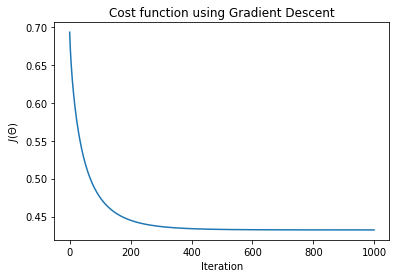

In [17]:
## Plotting the cost history

plt.plot(cost_history)
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")

## Plot Decision Boundary

In [32]:
def mapFeaturePlot(X,y,degree):
    out=np.ones(1)
    for i in range(1,degree+1):
        for j in range(i+1):
            terms=(X **(i-j) * y**j)
            out=np.hstack((out,terms))
    return out

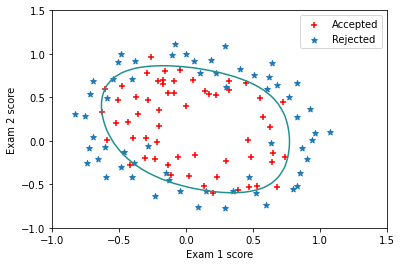

In [35]:
pos,neg= (y==1).reshape(len(y),1),(y==0).reshape(len(y),1)
plt.scatter(X[pos[:,0],1],X[pos[:,0],2],c='r',marker='+',label="Accepted")
plt.scatter(X[neg[:,0],1],X[neg[:,0],2],marker='*',label='Rejected')
u_vals = np.linspace(-1,1.5,50)
v_vals= np.linspace(-1,1.5,50)
z=np.zeros((len(u_vals),len(v_vals)))
for i in range(len(u_vals)):
    for j in range(len(v_vals)):
        z[i,j] =mapFeaturePlot(u_vals[i],v_vals[j],6) @ theta
plt.contour(u_vals,v_vals,z.T,0)
plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")
plt.legend(loc=0)

### Accuracy of model

In [36]:
def predictClasssifier(theta,X):
    predicts= X @ theta
    return predicts>0

In [46]:
p=predictClasssifier(theta,X)

In [50]:
print("Training acciracy", (sum(p==y[:,np.newaxis])/len(y)* 100),"%")

Training acciracy [83.05084746] %
